# Compares startup tests for msre simulations

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import pandas as pd

In [8]:

# filenames with results in them
ch_8_file = 'channel_8_startup_beta_eff_results.pkl'
ch_1_file = 'channel_1_startup_beta_eff_results.pkl'
ch_1mod_file = 'channel_1mod_startup_beta_eff_results.pkl'
ch_2_file = 'channel_2_startup_beta_eff_results.pkl'

# open the files now.
with open(ch_1_file, 'rb') as handle:
  ch_1_data = pkl.load(handle)

with open(ch_1mod_file, 'rb') as handle:
  ch_1mod_data = pkl.load(handle)

with open(ch_8_file, 'rb') as handle:
  ch_8_data = pkl.load(handle)

with open(ch_2_file, 'rb') as handle:
  ch_2_data = pkl.load(handle)

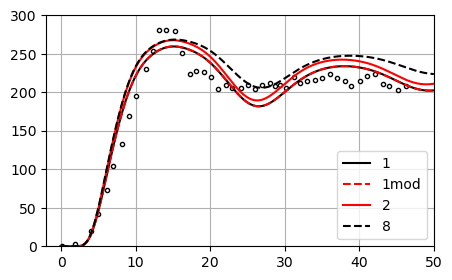

In [9]:
### EXP VALUES ###
msre_integral_worth = '../../Data/msre_integral_rod_worth.csv'
msre_data = '../../Data/msre_startup_datapoints.csv'

df = pd.read_csv(msre_integral_worth)
data = pd.read_csv(msre_data)

z = df['z'].values
rho = df[' rho'].values
pos = data['pos'].values
ornl_time_data = data['time'].values

values = np.interp(pos, z, rho)
base_insertion = values[0]
startup_base_insertion = values[0]

ornl_delta_rho_data = 1000*(values - base_insertion) # this is the data we calculated based on experimental values

# MAKE PLOT
plt.figure(figsize=(5,3))
plt.plot(ornl_time_data, ornl_delta_rho_data, 'ko', markerfacecolor='w', markersize=3)

### MY VALUES ###

# channel 1 data
x = np.array(list(ch_1_data.keys()))
y_MC = ch_1_data[-0.1] - np.array(list(ch_1_data.values()))
plt.plot(x, y_MC*10**5, 'k-', label='1')
# plt.plot(x[0::50], y[0::50]*10**5, 'ks', markerfacecolor='w')
# plt.plot(x[0::50], y[0::50]*10**5, 'k+', markerfacecolor='w')

# channel 1 data but modified
x = np.array(list(ch_1mod_data.keys()))
y_MC = ch_1mod_data[-0.1] - np.array(list(ch_1mod_data.values()))
plt.plot(x, y_MC*10**5, 'r--', label='1mod')

# channel 2 data
x = np.array(list(ch_2_data.keys()))
y_MC = ch_2_data[-0.1] - np.array(list(ch_2_data.values()))
plt.plot(x, y_MC*10**5, 'r-', label='2')

# channel 8 data
x = np.array(list(ch_8_data.keys()))
y_MC = ch_1_data[-0.1] - np.array(list(ch_8_data.values()))
plt.plot(x, y_MC*10**5, 'k--', label='8')


# OTHER PLOTTING STUFF
plt.grid()
plt.xlim([-2,50])
plt.ylim([0,300])
plt.legend()

